# Data visualization in R with ggplot2

## 1. Getting started with ggplot2

The ggplo2 package stands for 'Grammar or Graphics', so let's first look at how data visualization works in ggplot. It has 5 main ingredients:

- Tidy data
- Mapping 'aesthetics' to plot
- Geometric shapes (geoms) to plot
- Coordinate system
- Labels, guides (legends) and other anotations



In [1]:
# Looking at working directory
getwd()

[1] "C:/Users/ignia/Documents/Courses/R/Data Visualization and Dashboarding with R"

In [2]:
# Load packages
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [3]:
library(readxl)

df = read_excel('datasets/effective_lawmaking.xlsx')
head(df)

thomas_num,thomas_name,icpsr,congress,year,st_name,cd,dem,majority,elected,...,c_abc,c_pass,c_law,all_bills,all_aic,all_abc,all_pass,all_law,les,leslag
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Numeric counter for order in THOMAS data from 93rd - 110th Congresses,"Legislator name, as given in THOMAS","ICPSR number, according to Poole and Rosenthal",Congress number,Year at start of Congress,Two-letter state code,Congressional district number,1 = Democrat,1 = majority party member,Year first elected to House,...,Number of commemorative bills with action beyond committee,Number of commemorative bills passed House,Number of commemorative bills became law,Total bills sponsored,Total bills with action in committee,Total bills with action beyond committee,Total bills passed House,Total bills became law,Legislative Effectiveness Score (1-5-10),Lagged LES
1,"Abdnor, James",14000,93,1973,SD,2,0,0,1972,...,0,0,0,22,0,0,0,0,0.10957026481628418,NA
2,"Abzug, Bella",13001,93,1973,NY,20,1,1,1970,...,1,1,1,136,1,1,1,1,0.76243108510971069,NA
3,"Adams, Brock",10700,93,1973,WA,7,1,1,1964,...,0,0,0,37,2,2,2,1,1.2364784479141235,NA
4,"Addabbo, Joseph",10500,93,1973,NY,7,1,1,1960,...,0,0,0,38,0,0,0,0,0.15505225956439972,NA
5,"Albert, Carl",NA,93,1973,OK,3,NA,0,1946,...,0,0,0,1,0,0,0,0,1.0336817940697074E-3,NA


In [4]:
# Deleting first row
df = df[-1,]
head(df)

thomas_num,thomas_name,icpsr,congress,year,st_name,cd,dem,majority,elected,...,c_abc,c_pass,c_law,all_bills,all_aic,all_abc,all_pass,all_law,les,leslag
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Abdnor, James",14000,93,1973,SD,2,0,0,1972,...,0,0,0,22,0,0,0,0,0.10957026481628418,NA
2,"Abzug, Bella",13001,93,1973,NY,20,1,1,1970,...,1,1,1,136,1,1,1,1,0.76243108510971069,NA
3,"Adams, Brock",10700,93,1973,WA,7,1,1,1964,...,0,0,0,37,2,2,2,1,1.2364784479141235,NA
4,"Addabbo, Joseph",10500,93,1973,NY,7,1,1,1960,...,0,0,0,38,0,0,0,0,0.15505225956439972,NA
5,"Albert, Carl",NA,93,1973,OK,3,NA,0,1946,...,0,0,0,1,0,0,0,0,1.0336817940697074E-3,NA
6,"Alexander, Bill",12000,93,1973,AR,1,1,1,1968,...,0,0,0,53,3,3,2,1,1.8750505447387695,NA


In [5]:
# First glance at the dataset
names(df)
dim(df)
str(df)

[1] "thomas_num"     "thomas_name"    "icpsr"          "congress"      
 [5] "year"           "st_name"        "cd"             "dem"           
 [9] "majority"       "elected"        "female"         "afam"          
[13] "latino"         "votepct"        "votepct_sq"     "dwnom1"        
[17] "meddist"        "majdist"        "deleg_size"     "speaker"       
[21] "chair"          "subchr"         "power"          "budget"        
[25] "seniority"      "sensq"          "state_leg"      "state_leg_prof"
[29] "maj_leader"     "min_leader"     "south"          "south_dem"     
[33] "ss_bills"       "ss_aic"         "ss_abc"         "ss_pass"       
[37] "ss_law"         "s_bills"        "s_aic"          "s_abc"         
[41] "s_pass"         "s_law"          "c_bills"        "c_aic"         
[45] "c_abc"          "c_pass"         "c_law"          "all_bills"     
[49] "all_aic"        "all_abc"        "all_pass"       "all_law"       
[53] "les"            "leslag"

[1] 8016   54

tibble [8,016 x 54] (S3: tbl_df/tbl/data.frame)
 $ thomas_num    : chr [1:8016] "1" "2" "3" "4" ...
 $ thomas_name   : chr [1:8016] "Abdnor, James" "Abzug, Bella" "Adams, Brock" "Addabbo, Joseph" ...
 $ icpsr         : chr [1:8016] "14000" "13001" "10700" "10500" ...
 $ congress      : chr [1:8016] "93" "93" "93" "93" ...
 $ year          : chr [1:8016] "1973" "1973" "1973" "1973" ...
 $ st_name       : chr [1:8016] "SD" "NY" "WA" "NY" ...
 $ cd            : chr [1:8016] "2" "20" "7" "7" ...
 $ dem           : chr [1:8016] "0" "1" "1" "1" ...
 $ majority      : chr [1:8016] "0" "1" "1" "1" ...
 $ elected       : chr [1:8016] "1972" "1970" "1964" "1960" ...
 $ female        : chr [1:8016] "0" "1" "0" "0" ...
 $ afam          : chr [1:8016] "0" "0" "0" "0" ...
 $ latino        : chr [1:8016] "0" "0" "0" "0" ...
 $ votepct       : chr [1:8016] "55" "56" "85" "75" ...
 $ votepct_sq    : chr [1:8016] "3025" "3136" "7225" "5625" ...
 $ dwnom1        : chr [1:8016] "0.22800000011920929" "-0.6

#### 1.1 Tidy Data

Let's filter some data we want for making a plot

In [6]:
df93 = df %>% 
    filter(congress == 93) %>%              # Rows with 93 as congress
    select("seniority", "all_pass") %>%     # Keep only those 2 columns
    drop_na() %>%                           # Drop null values
    mutate_at(vars(seniority, all_pass), as.numeric)

df93


seniority,all_pass
<dbl>,<dbl>
1,0
2,1
5,2
7,0
14,0
3,2
7,0
3,0
1,0


#### 1.2 Aesthetics

Now let's call the `ggplot()` function and map it to the desired aesthetics:


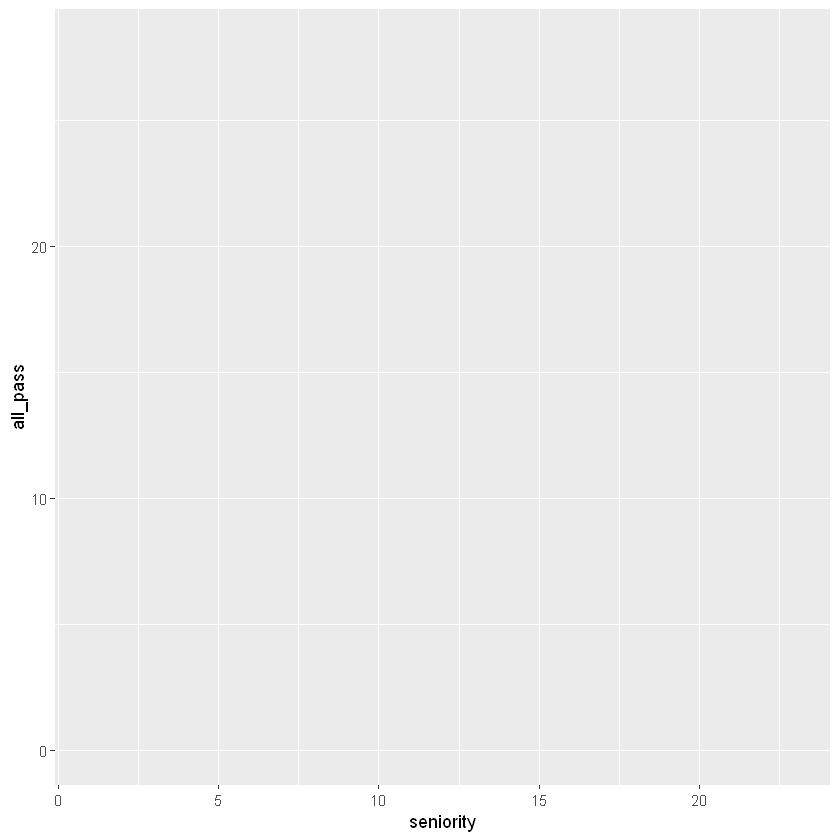

In [7]:
ggplot(df93, aes(x = seniority, y = all_pass))

As you may see, nothing is plotted in this chart, becase no geom was assigned to the plot.

#### 1.3 Geometrics

There are many geoms available as: points, bars, boxplots, lines and many more. For a scatter plot, we will use the `geom_point()` while adding the geom with a + sign:


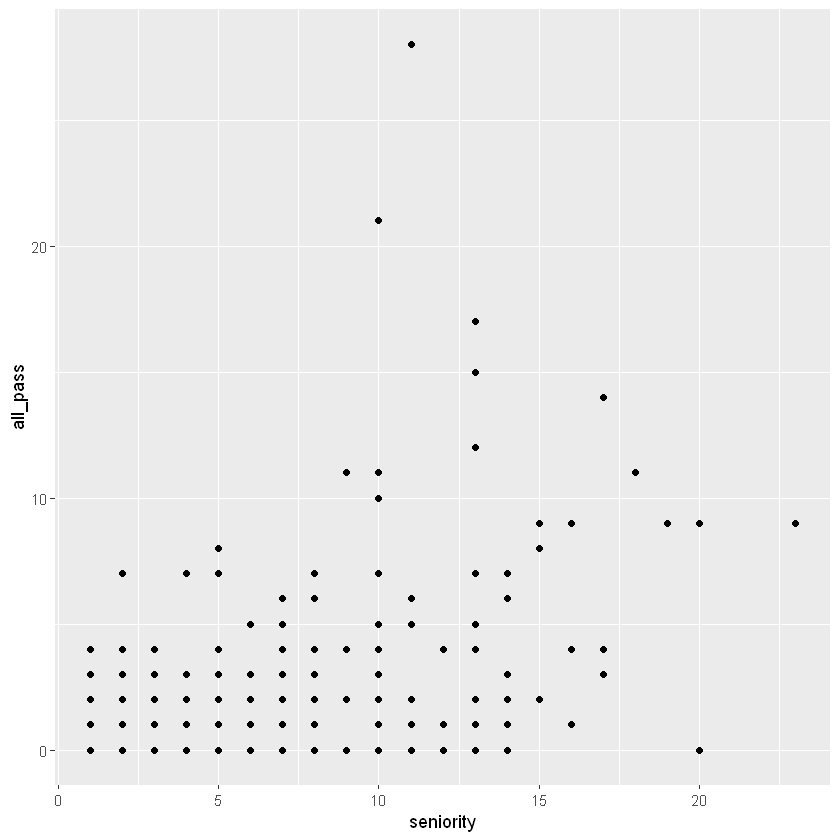

In [8]:
ggplot(df93, aes(x = seniority, y = all_pass)) +
    geom_point()

However, there's an issue with overlapping. We can see where the points are, but we cannot see how many occurences are in each point of the plot.To help represent this, and not having these points overlapped on top of each other, we´re going to change this slighlty by adding some random noise to the data with the `geom_jitter()` geom function:

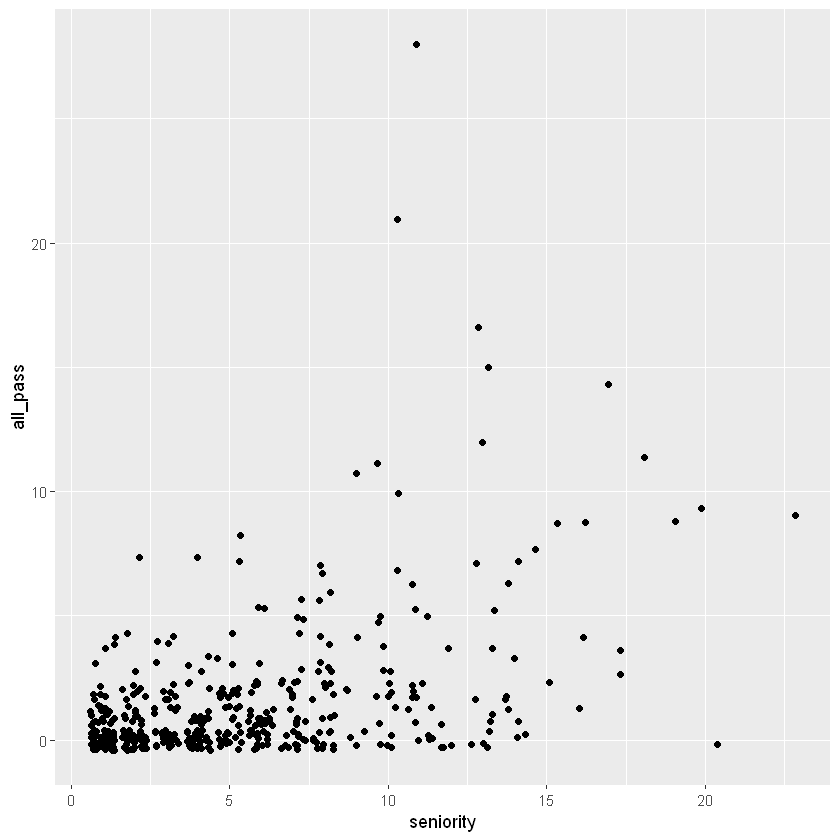

In [9]:
ggplot(df93, aes(x = seniority, y = all_pass)) +
    geom_jitter()

We can now look at the different points in the dataset, but we have to bear in mind that this plot does not displays exactly the underlying data.

#### 1.4 Labels and guides

With the `labs()` function we can add some labels and a title:


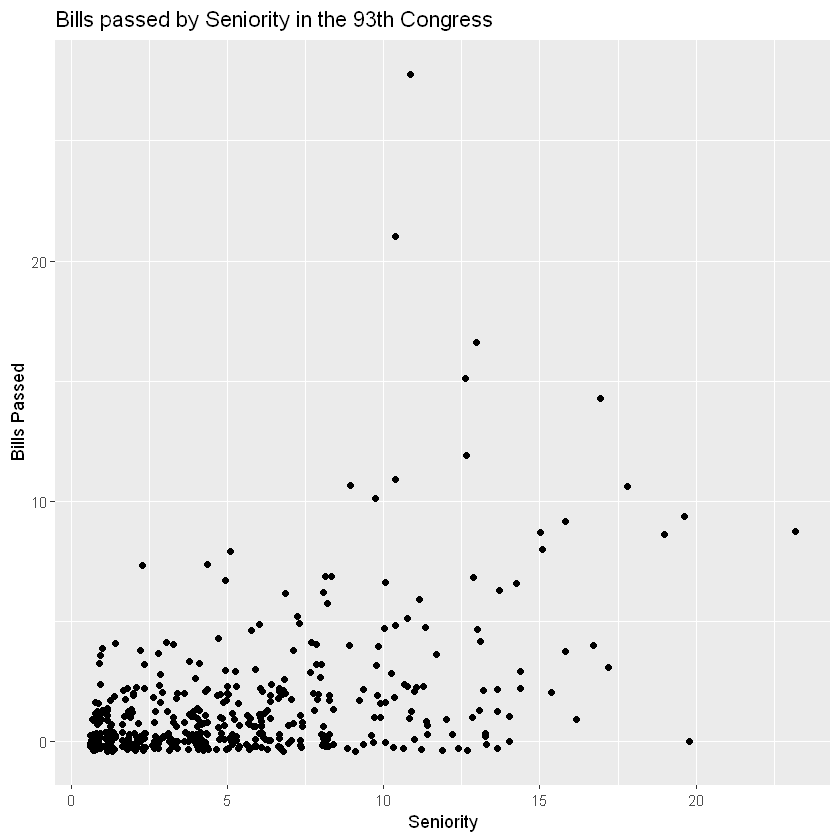

In [10]:
ggplot(df93, aes(x = seniority, y = all_pass)) +
    geom_jitter() +
    labs(x = "Seniority", 
         y = "Bills Passed",
         title = "Bills passed by Seniority in the 93th Congress")

Now, let's add some more information on the plot by separating the Democrats and Republicans with colors.

In [11]:
df93 = df %>% 
    filter(congress == 93) %>%
    select("seniority", "all_pass", "dem") %>%
    drop_na() %>%
    mutate_at(vars(seniority, all_pass), as.numeric)

head(df93)


seniority,all_pass,dem
<dbl>,<dbl>,<chr>
1,0,0
2,1,1
5,2,1
7,0,1
3,2,1
7,0,0


And we can pass this color attribute with the `color` argument of the ggplot function:

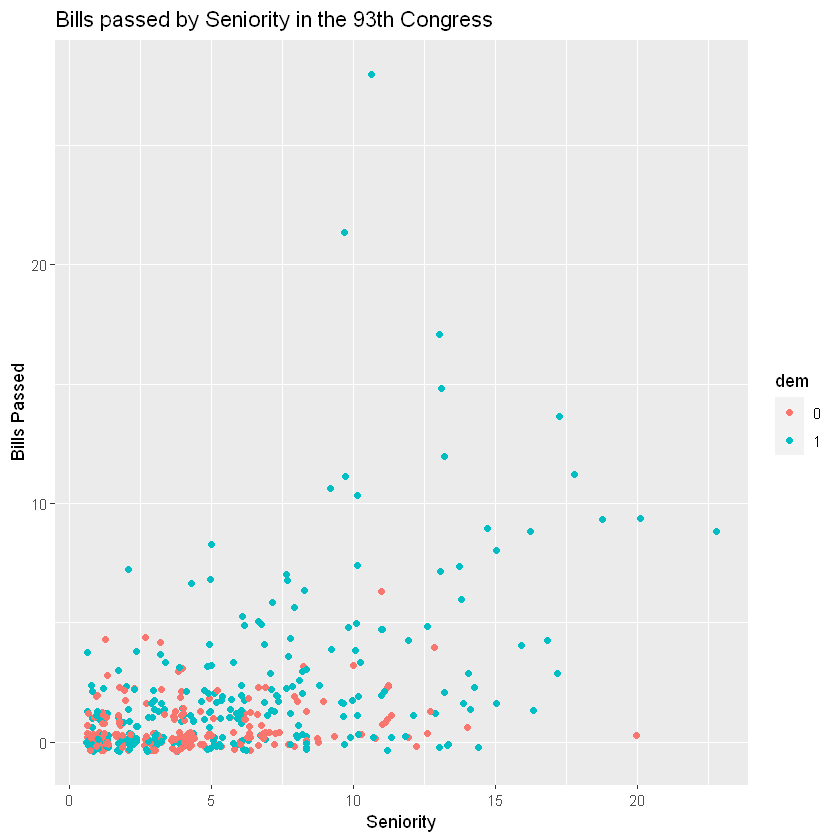

In [12]:
ggplot(df93, aes(x = seniority, y = all_pass, color = dem)) +
    geom_jitter() +
    labs(x = "Seniority", 
         y = "Bills Passed",
         title = "Bills passed by Seniority in the 93th Congress")

We can also recode the values of the dem column like this:

In [13]:
df93$dem = recode(df93$dem, '1' = 'Democrat', '0' = 'Republican')

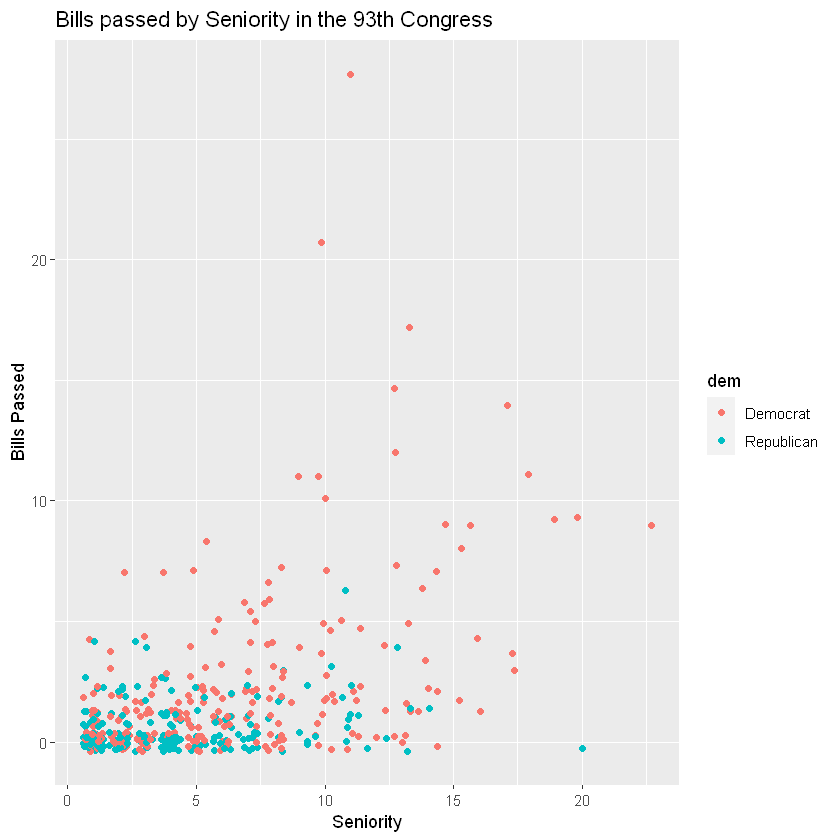

In [14]:
ggplot(df93, aes(x = seniority, y = all_pass, color = dem)) +
    geom_jitter() +
    labs(x = "Seniority", 
         y = "Bills Passed",
         title = "Bills passed by Seniority in the 93th Congress")

We can also set the colors we want by adding the `scale_color_manual()` function: 

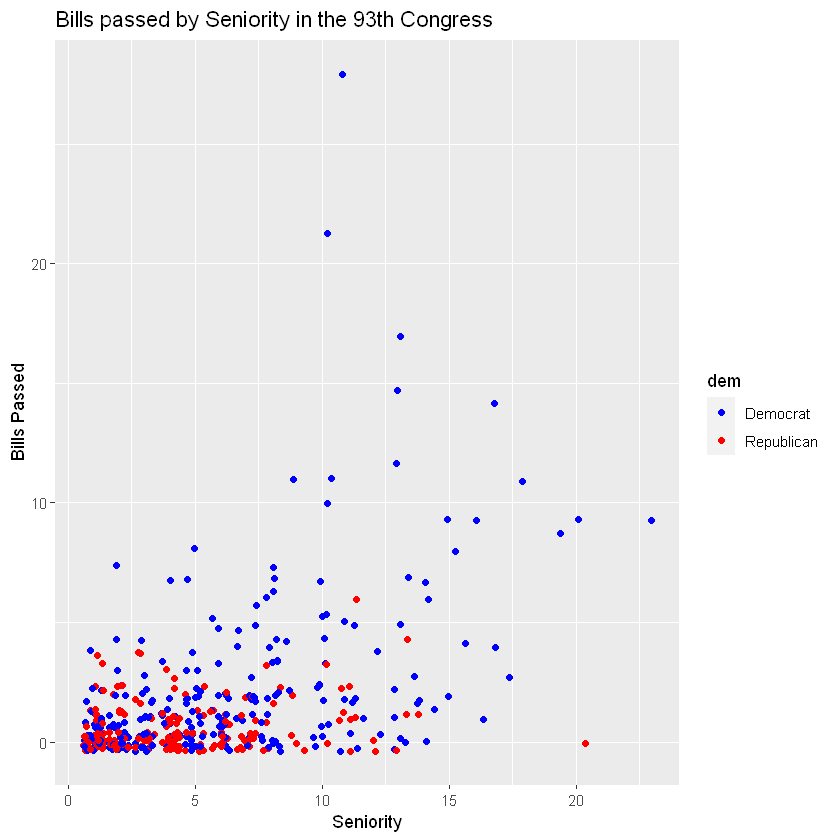

In [15]:
ggplot(df93, aes(x = seniority, y = all_pass, color = dem)) +
    geom_jitter() +
    labs(x = "Seniority", 
         y = "Bills Passed",
         title = "Bills passed by Seniority in the 93th Congress") +
    scale_color_manual(values = c("blue", "red"))

#### 1.5 Making two different plots

If we don't want to make the same plot for Democrats and Republicans, we can make two plots with the `facet_wrap()` function:

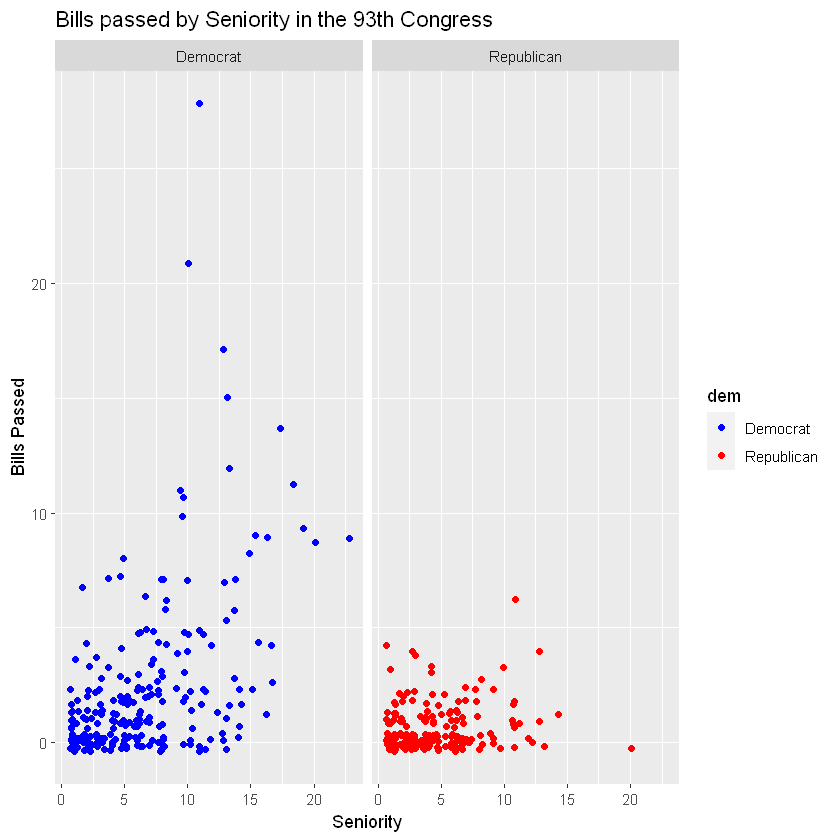

In [16]:
ggplot(df93, aes(x = seniority, y = all_pass, color = dem)) +
    geom_jitter() +
    labs(x = "Seniority", 
         y = "Bills Passed",
         title = "Bills passed by Seniority in the 93th Congress") +
    scale_color_manual(values = c("blue", "red")) +
    facet_wrap(~dem)

For making this division horizontally, we can set the number of columns to one, with the `ncol` argument:

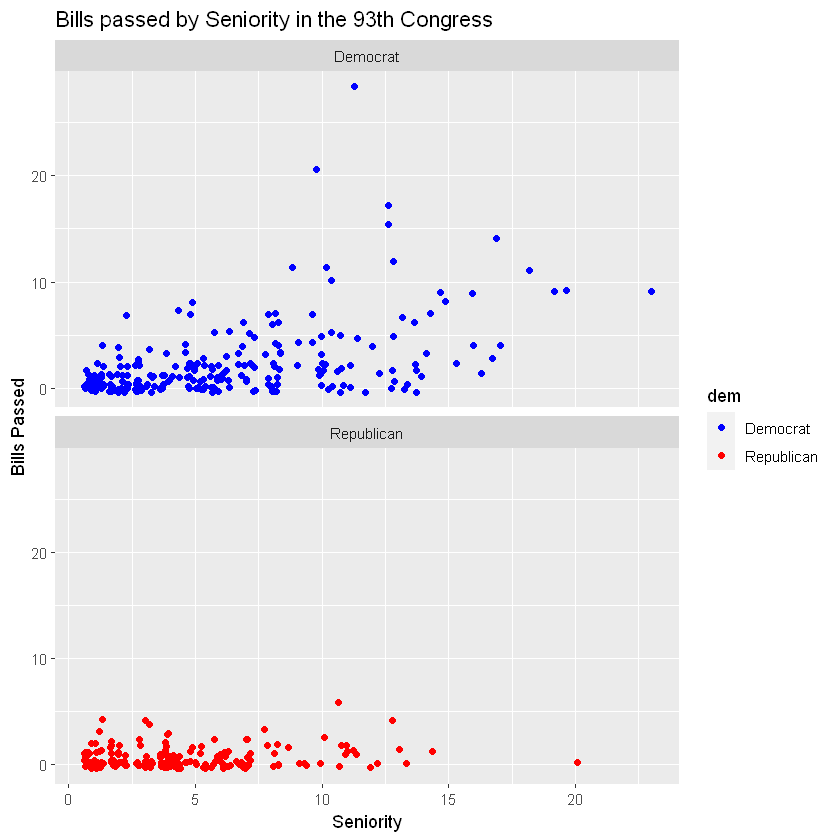

In [17]:
ggplot(df93, aes(x = seniority, y = all_pass, color = dem)) +
    geom_jitter() +
    labs(x = "Seniority", 
         y = "Bills Passed",
         title = "Bills passed by Seniority in the 93th Congress") +
    scale_color_manual(values = c("blue", "red")) +
    facet_wrap(~dem, ncol = 1)

## 2. Univariate plots

We are gonna look at visualizations that display summaries of the data or underlying data distributions for single variables in the dataset. One of the classic kinds of this summaries is the `boxplot` which includes the IQR (Inter-Quartile Range), the median, etc.


In [18]:
# Loading the dataset
cces = read_csv('datasets/cces.csv')
head(cces)



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double(),
  race_other = col_character(),
  CC20_hisp_t = col_character(),
  CC20_asian_t = col_character(),
  multrace_97 = col_logical(),
  CC20_300d_6 = col_logical(),
  CC20_309d_t = col_character(),
  CC20_364a_t = col_character(),
  CC20_365_voted_t = col_character(),
  CC20_365b_voted_t = col_character(),
  CC20_366_voted_t = col_character(),
  CC20_367_voted_t = col_character(),
  CC20_364b_t = col_character(),
  CC20_365_t = col_character(),
  CC20_365b_t = col_character(),
  CC20_365c_t = col_character(),
  CC20_366_t = col_character(),
  CC20_367_t = col_character(),
  CC20_367a_t = col_character(),
  presvote16post_t = col_character(),
  pid3_t = col_character()
  # ... with 153 more columns
)
i Use `spec()` for the full column specifications.


Warning message:
"32587 parsing failures.
 row             col           expected      

caseid,commonweight,commonpostweight,vvweight,vvweight_post,tookpost,CCEStake,birthyr,gender,educ,...,CL_2020ppep,CL_2020ppvm,CL_2020pep,CL_2020pvm,CL_state,CL_party,starttime,endtime,starttime_post,endtime_post
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1232318697,0.7825103,0.6659710,0.8509167,0.6065928,2,1,1966,1,4,...,NA,1,NA,1,7,11,9/29/2020 21:22,10/14/2020 19:54,11/17/2020 20:34,11/17/2020 21:14
1231394915,1.3444245,1.4355936,NA,NA,2,1,1955,2,6,...,NA,NA,NA,NA,25,13,9/30/2020 0:15,10/19/2020 17:45,12/4/2020 19:33,12/4/2020 19:46
1232451503,0.4055196,0.3424541,NA,NA,2,1,1946,2,5,...,NA,NA,NA,NA,NA,NA,9/29/2020 23:31,10/1/2020 19:59,11/26/2020 16:29,11/26/2020 16:54
1232494791,0.9577344,0.8221059,1.0414587,1.0024952,2,1,1962,2,5,...,NA,NA,1,5,20,8,9/30/2020 0:07,10/2/2020 18:01,11/16/2020 0:54,11/16/2020 1:16
1232494829,0.1946648,0.1617253,NA,NA,2,1,1967,1,5,...,NA,NA,NA,NA,NA,NA,9/30/2020 0:08,9/30/2020 23:51,11/13/2020 17:00,11/13/2020 17:11
1232473675,1.0569137,0.8803970,1.1493082,0.9883287,2,1,1961,1,3,...,NA,NA,NA,NA,36,13,9/30/2020 0:43,10/16/2020 21:50,11/26/2020 13:27,11/26/2020 13:37


#### 2.1 Boxplot

Let's make a boxplot of the 'faminc_new' column with the `geom_boxplot()` function:

Warning message:
"Removed 19 rows containing non-finite values (stat_boxplot)."


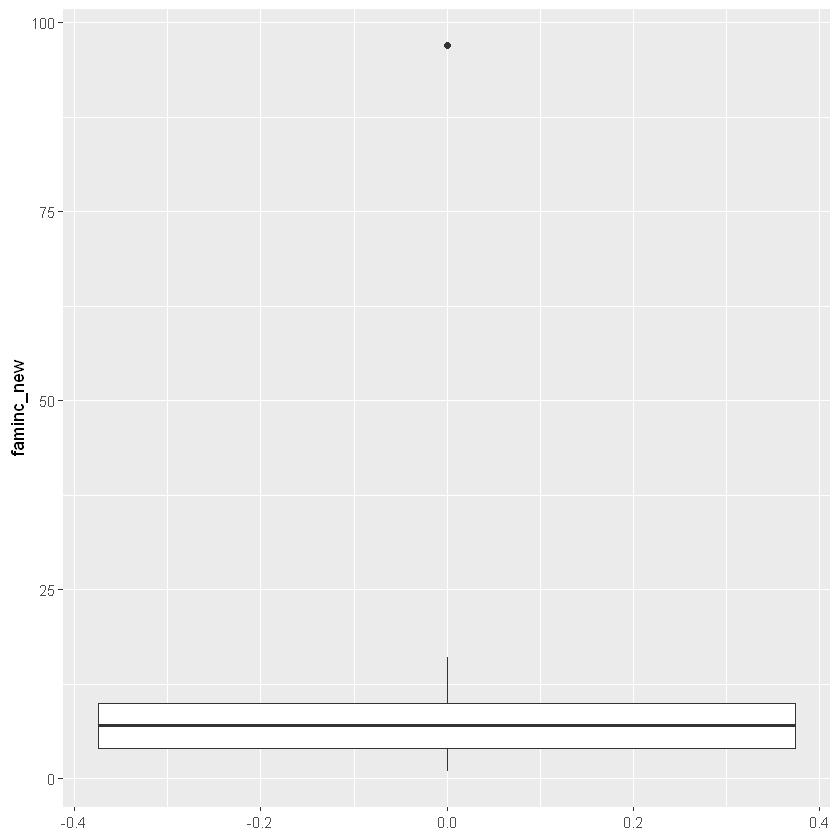

In [19]:
ggplot(cces, aes(y = faminc_new)) +
      geom_boxplot()

There is an outlier value that we can replace with the mean value

In [20]:
cces$faminc_new[cces$faminc_new > 50] = mean(cces$faminc_new[cces$faminc_new <= 50])


Warning message:
"Removed 6094 rows containing non-finite values (stat_boxplot)."


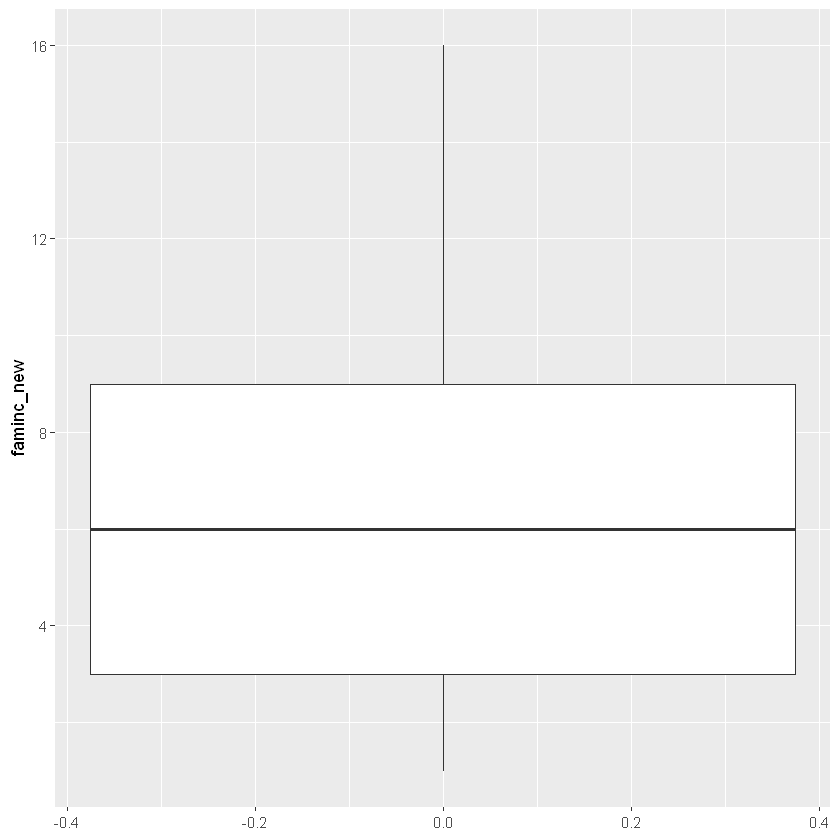

In [21]:
ggplot(cces, aes(y = faminc_new)) +
      geom_boxplot()

We can also break down this boxplot by education level groups with the `group` argument:

Warning message:
"Removed 6094 rows containing non-finite values (stat_boxplot)."


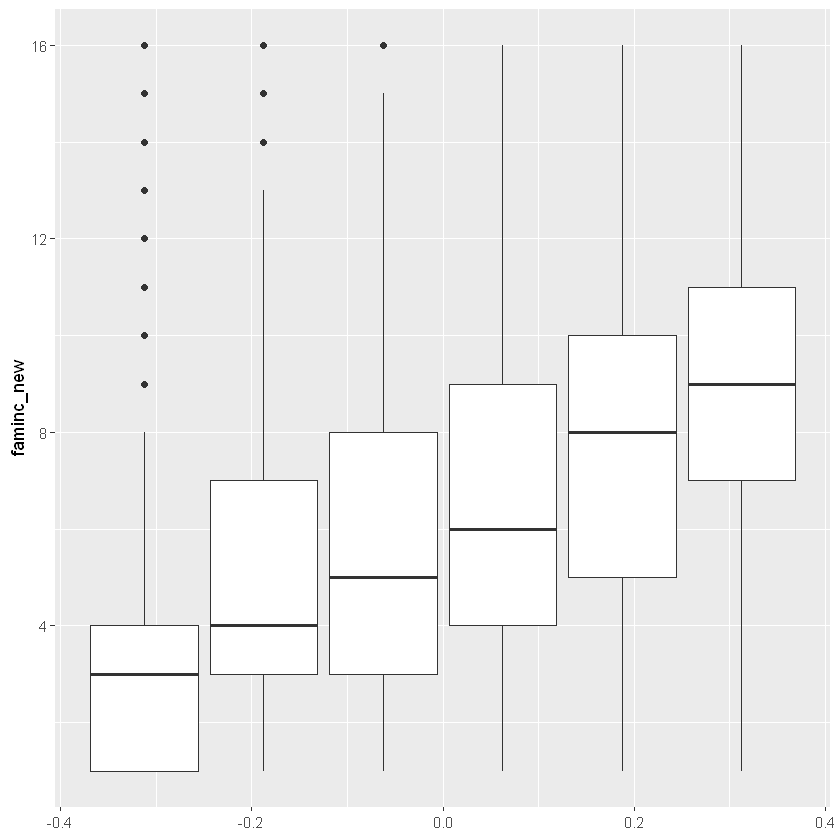

In [22]:
ggplot(cces, aes(y = faminc_new, group = educ)) +
      geom_boxplot()

Another tweak you may want to make is to convert the numeric encoding for the education level variable to a categorical one:

In [23]:
cces$educ_category = recode(cces$educ, 
                           '1' = "<4 yr Degree",
                           '2' = "<4 yr Degree",
                           '3' = "<4 yr Degree",
                           '4' = "<4 yr Degree",
                           '5' = "4 yr Degree",
                           '6' = ">4 yr Deg")


As now the values are categorical, we need to change de grouping to an x value:

Warning message:
"Removed 6094 rows containing non-finite values (stat_boxplot)."


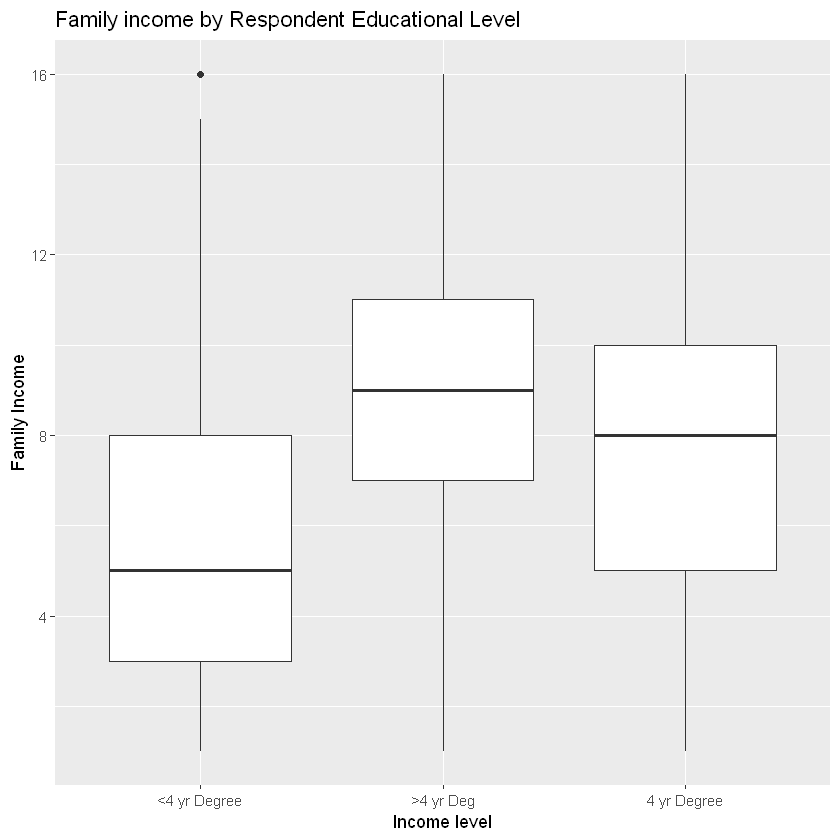

In [24]:
ggplot(cces, aes(y = faminc_new, x = educ_category)) +
    geom_boxplot() + 
    labs(x = "Income level", y = "Family Income",
        title = "Family income by Respondent Educational Level")


#### 2.2 Histogram

Can be done with the `geom_histogram()` function


Warning message:
"Removed 6094 rows containing non-finite values (stat_bin)."


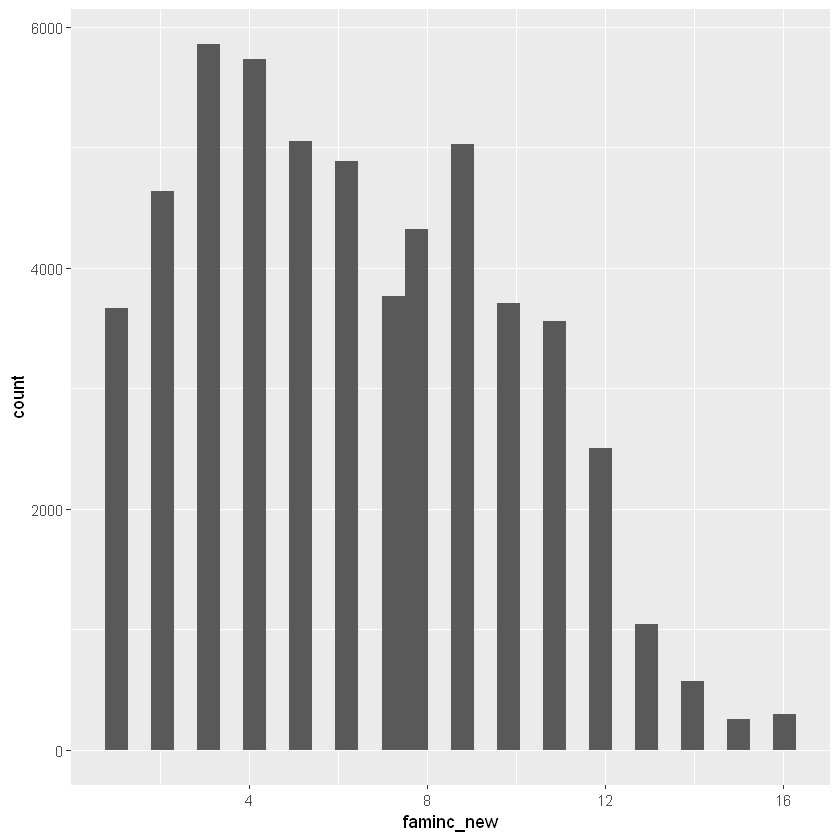

In [25]:
ggplot(cces, aes(x = faminc_new)) +
    geom_histogram(bins = 30)


#### 2.3 Density

Can be done with the `geom_density()` function


Warning message:
"Removed 6094 rows containing non-finite values (stat_density)."


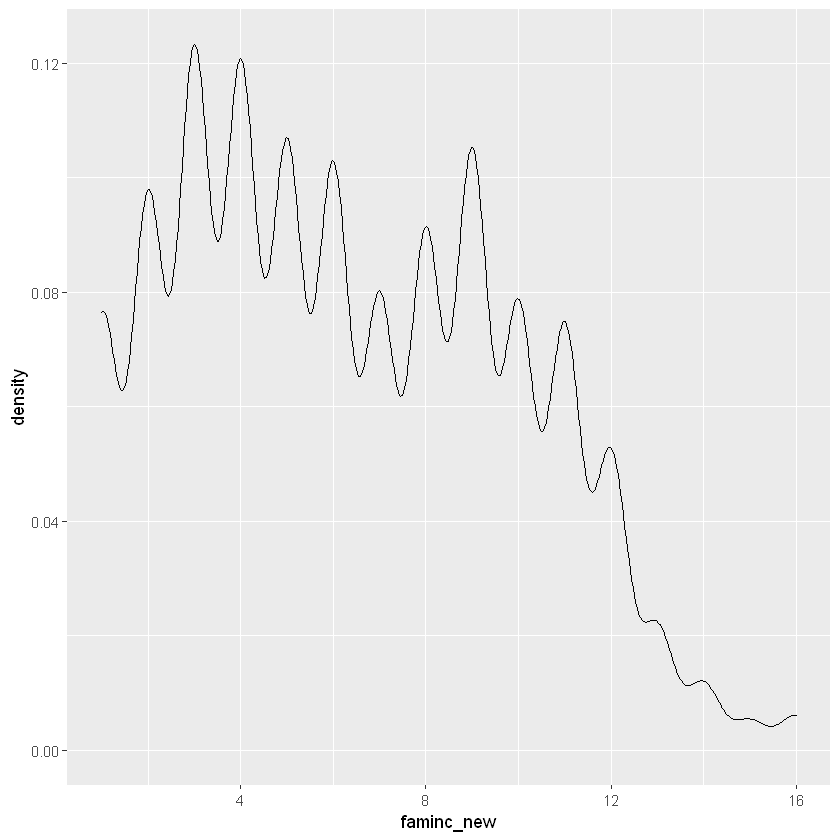

In [26]:
ggplot(cces, aes(x = faminc_new)) +
    geom_density()


## 3. Multivariate plots

#### 3.1 Barplots


In [27]:
# Load dataset
df = read_excel('datasets/effective_lawmaking.xlsx')
df = df[-1,]
head(df)


thomas_num,thomas_name,icpsr,congress,year,st_name,cd,dem,majority,elected,...,c_abc,c_pass,c_law,all_bills,all_aic,all_abc,all_pass,all_law,les,leslag
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Abdnor, James",14000,93,1973,SD,2,0,0,1972,...,0,0,0,22,0,0,0,0,0.10957026481628418,NA
2,"Abzug, Bella",13001,93,1973,NY,20,1,1,1970,...,1,1,1,136,1,1,1,1,0.76243108510971069,NA
3,"Adams, Brock",10700,93,1973,WA,7,1,1,1964,...,0,0,0,37,2,2,2,1,1.2364784479141235,NA
4,"Addabbo, Joseph",10500,93,1973,NY,7,1,1,1960,...,0,0,0,38,0,0,0,0,0.15505225956439972,NA
5,"Albert, Carl",NA,93,1973,OK,3,NA,0,1946,...,0,0,0,1,0,0,0,0,1.0336817940697074E-3,NA
6,"Alexander, Bill",12000,93,1973,AR,1,1,1,1968,...,0,0,0,53,3,3,2,1,1.8750505447387695,NA


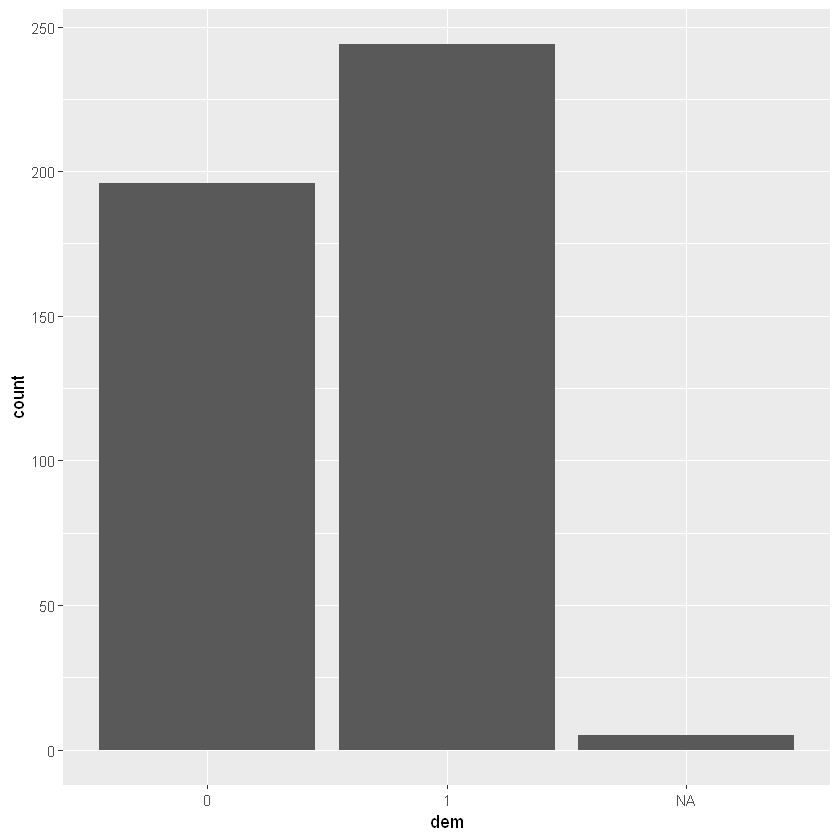

In [28]:
# Data Wrangling
df %>%
    filter(congress == 93) %>%
    ggplot(aes(x = dem)) + 
        geom_bar()


Let's recode the dem variable so that it shows 'Republican' adn 'Democrat'

In [29]:
df$dem = recode(df$dem, '1' = 'Democrat', '0' = 'Republican')

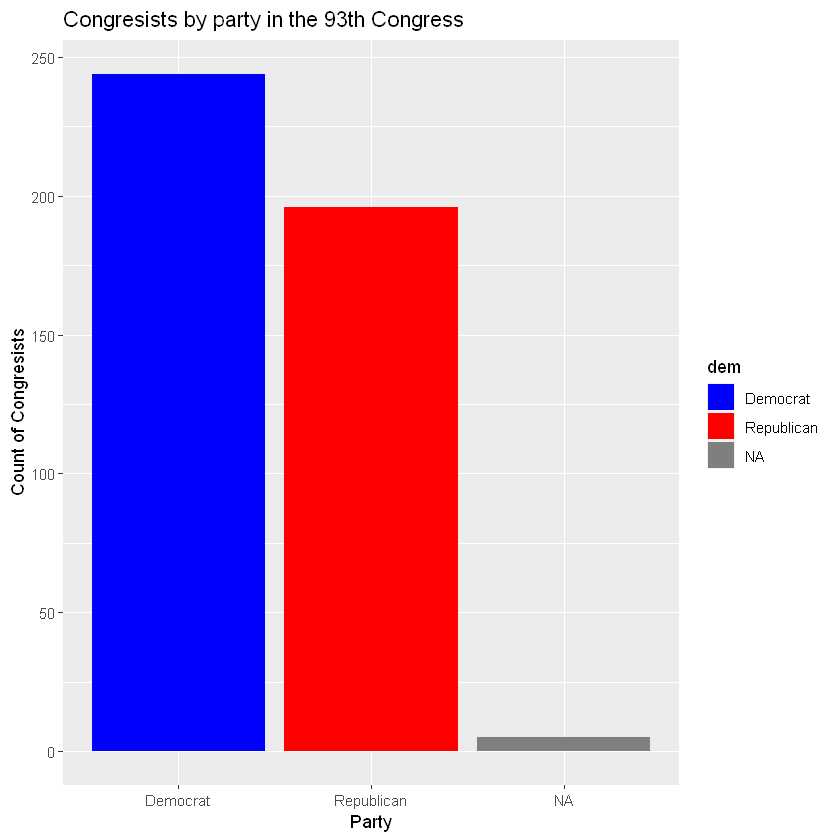

In [44]:
# Data Wrangling
df %>%
    filter(congress == 93) %>%
    ggplot(aes(x = dem, fill = dem)) + 
        geom_bar() +
        labs(x = 'Party', y = 'Count of Congresists',
            title = 'Congresists by party in the 93th Congress') +
        scale_fill_manual(values = c("blue", "red"))


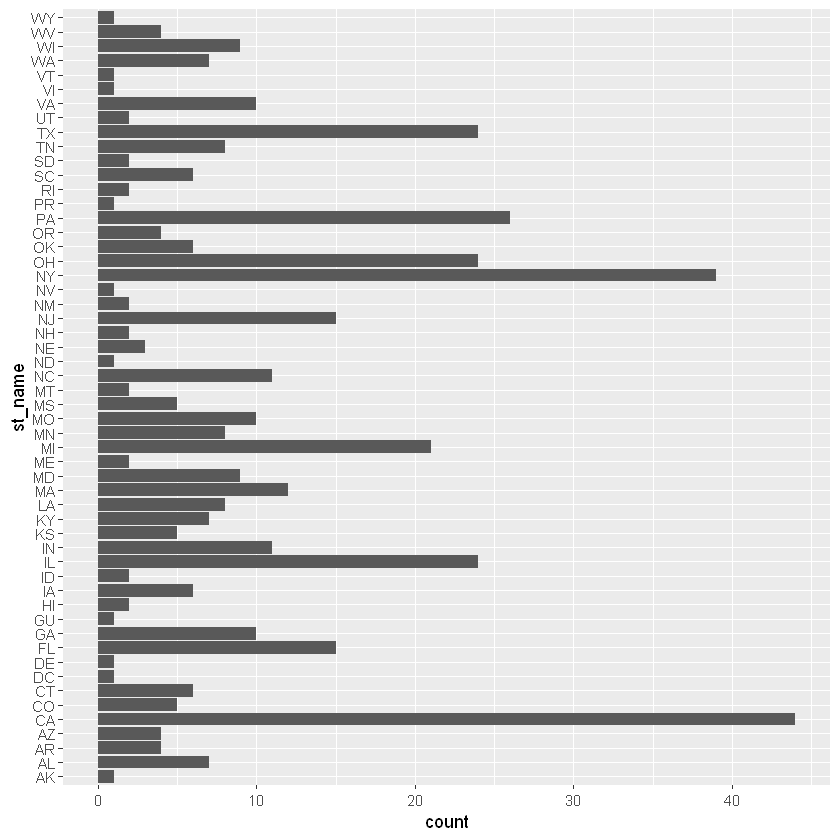

In [31]:
# Data Wrangling
df %>%
    filter(congress == 93) %>%
    ggplot(aes(y = st_name)) + 
        geom_bar()


We can also make a barplot of the proportions instead of the counts

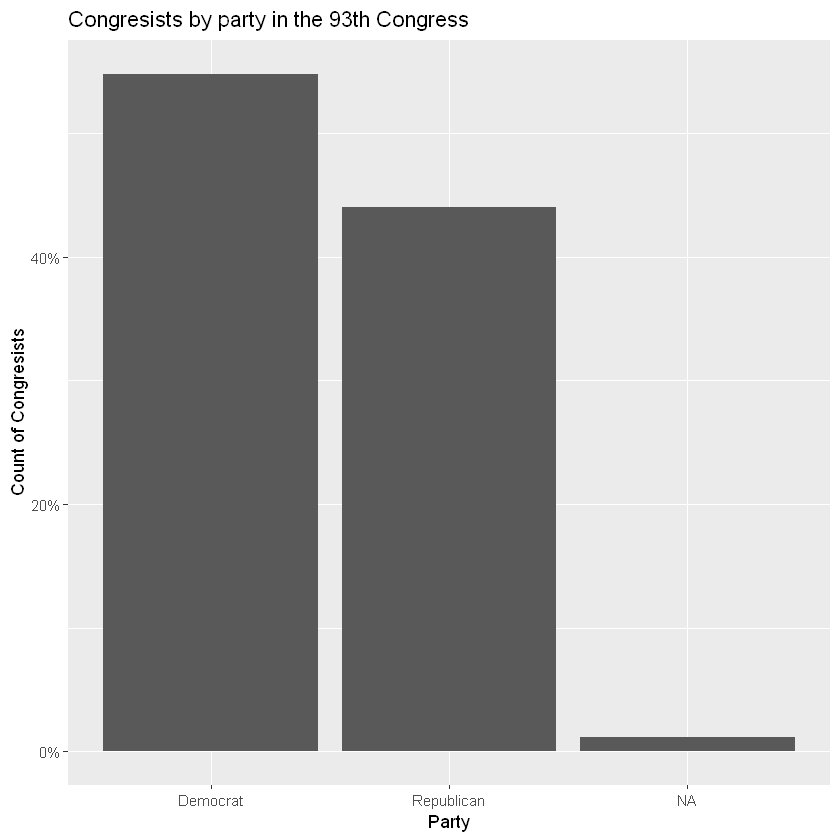

In [32]:
# Data Wrangling
df %>%
    filter(congress == 93) %>%
    ggplot() + 
        geom_bar(mapping = aes(x = dem, y = ..prop.., group = 1,fill = dem), 
                 stat = "count") + 
        scale_y_continuous(labels = scales::percent_format()) +
        labs(x = 'Party', y = 'Count of Congresists',
            title = 'Congresists by party in the 93th Congress')


In [37]:
unique(cces$pid7)

[1] 6 1 3 4 7 2 5 8

In [39]:
cces$pid7 = recode(cces$pid7,
                       '1' = "Democrat",
                       '2' = "Democrat",
                       '3' = "Democrat",
                       '4' = "Independent",
                       '5' = "Independent",
                       '6' = "Republican",
                       '7' = "Republican",
                       '8' = "Republican"
                  )


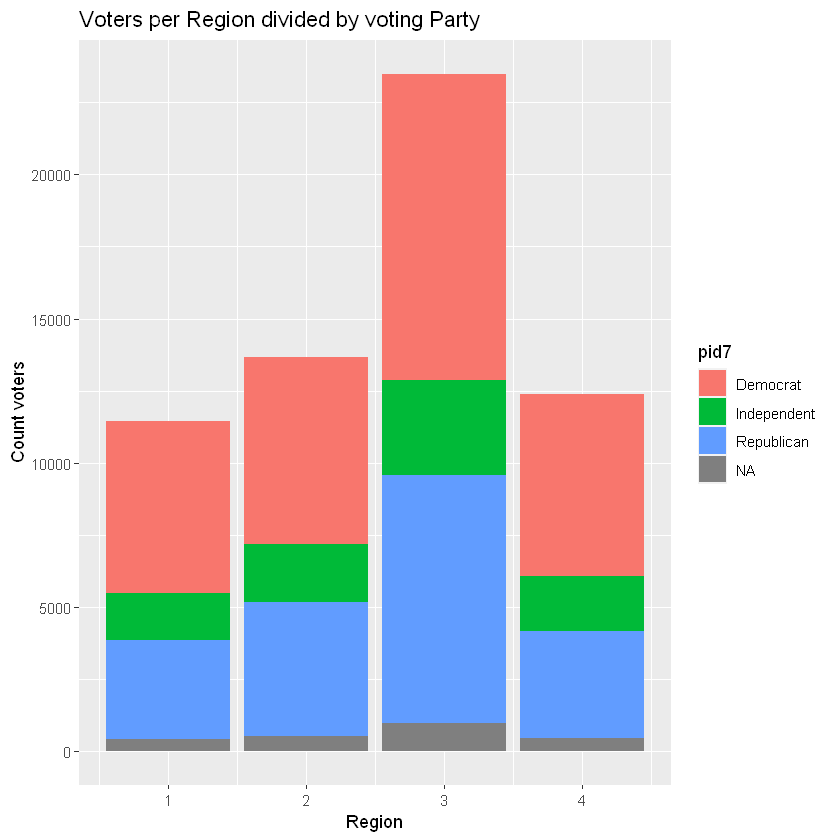

In [41]:
ggplot(cces, aes(x = region, fill = pid7)) +
    geom_bar() +
    labs(x = 'Region', y = 'Count voters',
         title = 'Voters per Region divided by voting Party')

However, if we don't want these bars to be stacked, and we want the different voting parties separated, we can add the `position = "dodge"` to the `geom_bar()` function:

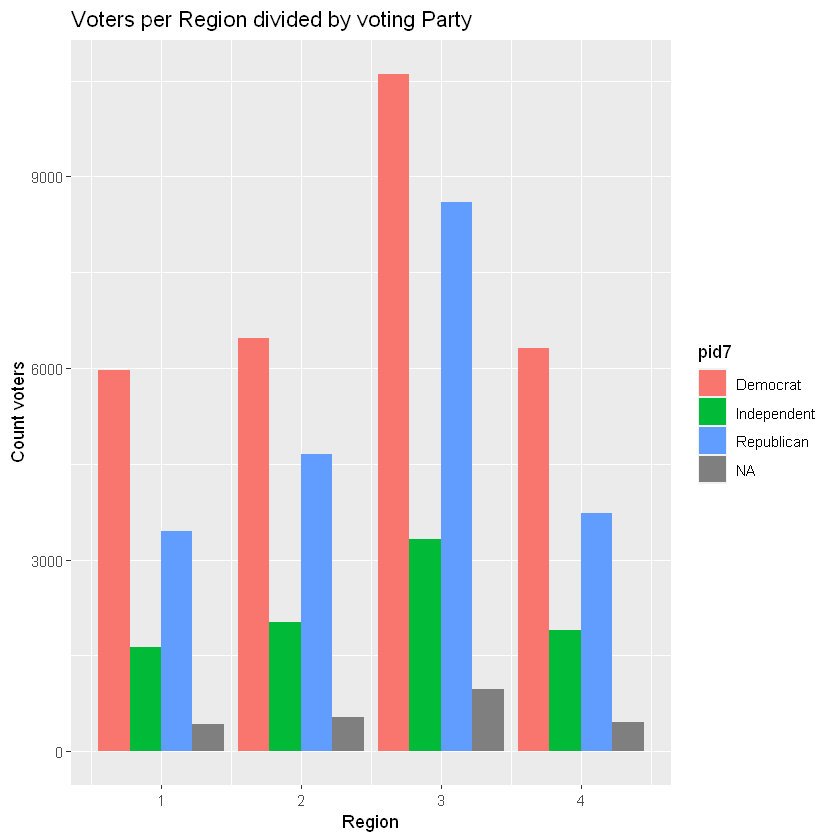

In [42]:
ggplot(cces, aes(x = region, fill = pid7)) +
    geom_bar(position = "dodge") +
    labs(x = 'Region', y = 'Count voters',
         title = 'Voters per Region divided by voting Party')

#### 3.2 Line plots and Time Series


In [49]:
# Generating fake data
years = seq(2001, 2020, by = 1)
price = rnorm(20, mean = 15, sd = 5)

# Putting data into a tibble (table)
stock_df = tibble("Year" = years, "StockPrice" = price)


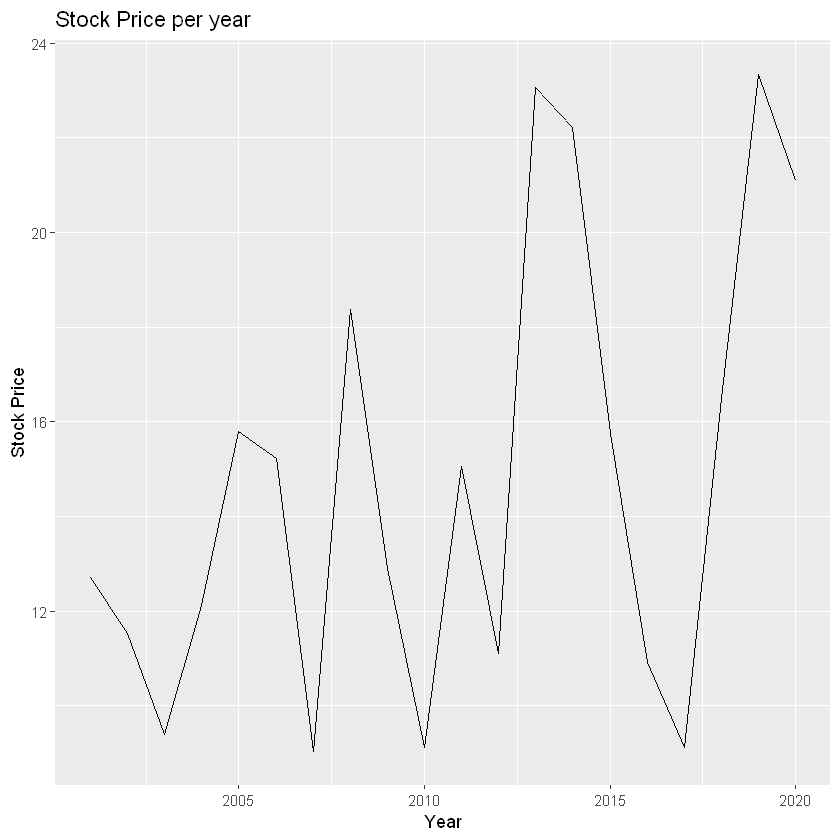

In [50]:
ggplot(stock_df, aes(x = years, y = price)) + 
    geom_line() +
    labs(x = 'Year', y = 'Stock Price',
         title = 'Stock Price per year')

We'll add a Stock Id column for keeping track of different stock prices

In [51]:
stock_df$stock_id = rep("Stock_1", 20)

Now, we'll add another stock price for showing more than one in the same chart

In [52]:
# Generating fake data
years = seq(2001, 2020, by = 1)
price = rnorm(20, mean = 10, sd = 3)

# Putting data into a tibble (table)
stock_df2 = tibble("Year" = years, "StockPrice" = price)
stock_df2$stock_id = rep("Stock_2", 20)


Now we can combine both tibbles so we have a time series with both stocks

In [54]:
all_stocks = bind_rows(stock_df, stock_df2)
head(all_stocks)

Year,StockPrice,stock_id
<dbl>,<dbl>,<chr>
2001,12.716102,Stock_1
2002,11.522096,Stock_1
2003,9.388709,Stock_1
2004,12.117003,Stock_1
2005,15.789096,Stock_1
2006,15.230183,Stock_1


In [55]:
tail(all_stocks)

Year,StockPrice,stock_id
<dbl>,<dbl>,<chr>
2015,8.860942,Stock_2
2016,11.263006,Stock_2
2017,11.302013,Stock_2
2018,16.119501,Stock_2
2019,12.219583,Stock_2
2020,14.354476,Stock_2


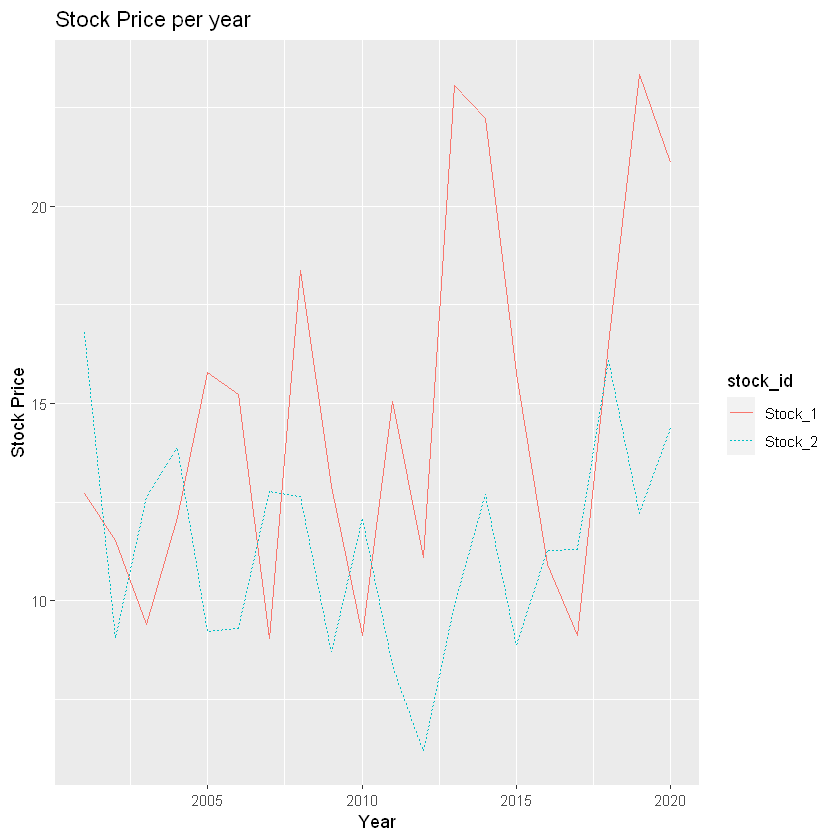

In [58]:
ggplot(all_stocks, aes(x = Year, y = StockPrice, group = stock_id,
                       color = stock_id, linetype = stock_id)) + 
    geom_line() +
    labs(x = 'Year', y = 'Stock Price',
         title = 'Stock Price per year')

We can also plot both stocks in different charts with the `facet_wrap()` function

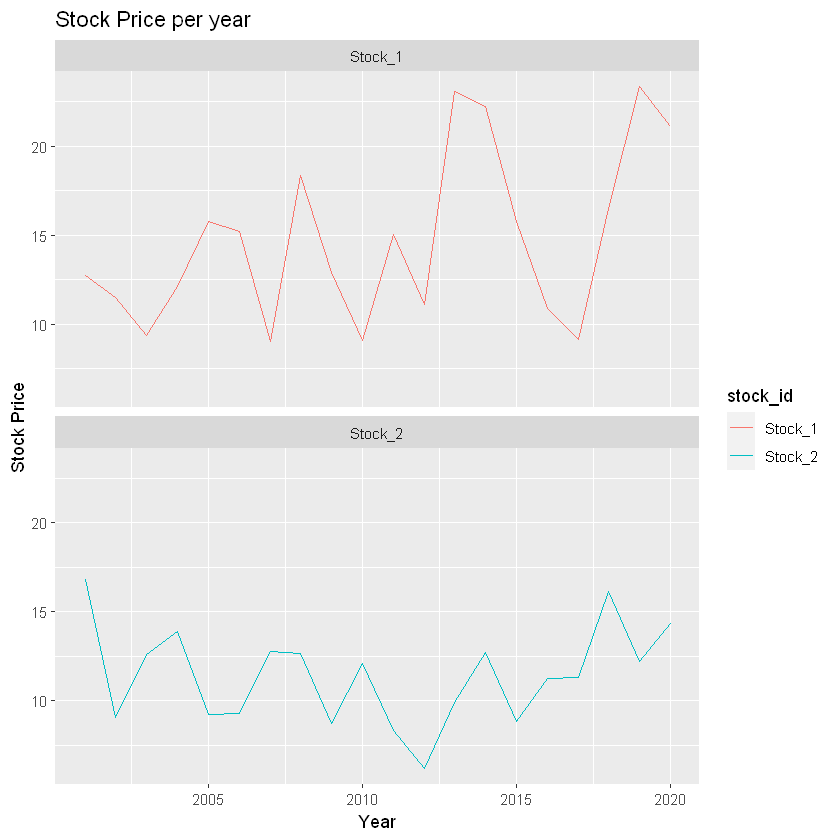

In [62]:
ggplot(all_stocks, aes(x = Year, y = StockPrice, group = stock_id, color = stock_id)) + 
    geom_line() +
    facet_wrap(~stock_id, ncol = 1) +
    labs(x = 'Year', y = 'Stock Price',
         title = 'Stock Price per year')

Customizing colors

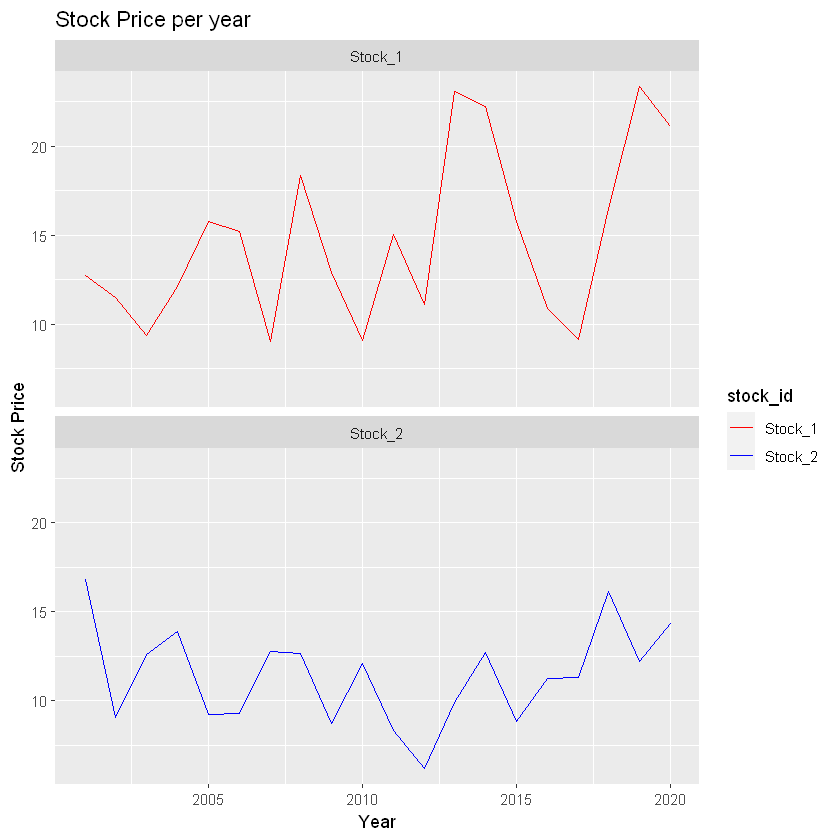

In [64]:
ggplot(all_stocks, aes(x = Year, y = StockPrice, group = stock_id, color = stock_id)) + 
    geom_line() +
    scale_color_manual(values = c("red", "blue")) +
    facet_wrap(~stock_id, ncol = 1) +
    labs(x = 'Year', y = 'Stock Price',
         title = 'Stock Price per year')

#### 3.3 Heatmaps and other visualizations

There are many open source resources for how to make data visualizations in ggplot. One of these really great open source resources is the [R Graph Gallery](https://www.r-graph-gallery.com), which is a freely available website that provides templates for many of the figures that you can create in R. Some using ggplot and some using other packages.



In [65]:
# Dummy data
x = LETTERS[1:20]
y = paste0("var", seq(1,20))

# Creating dummy table with A1, A2, ..., A20, B1, ..., T20.
data = expand.grid(X = x, Y = y)
data$Z = runif(400, 0, 5)


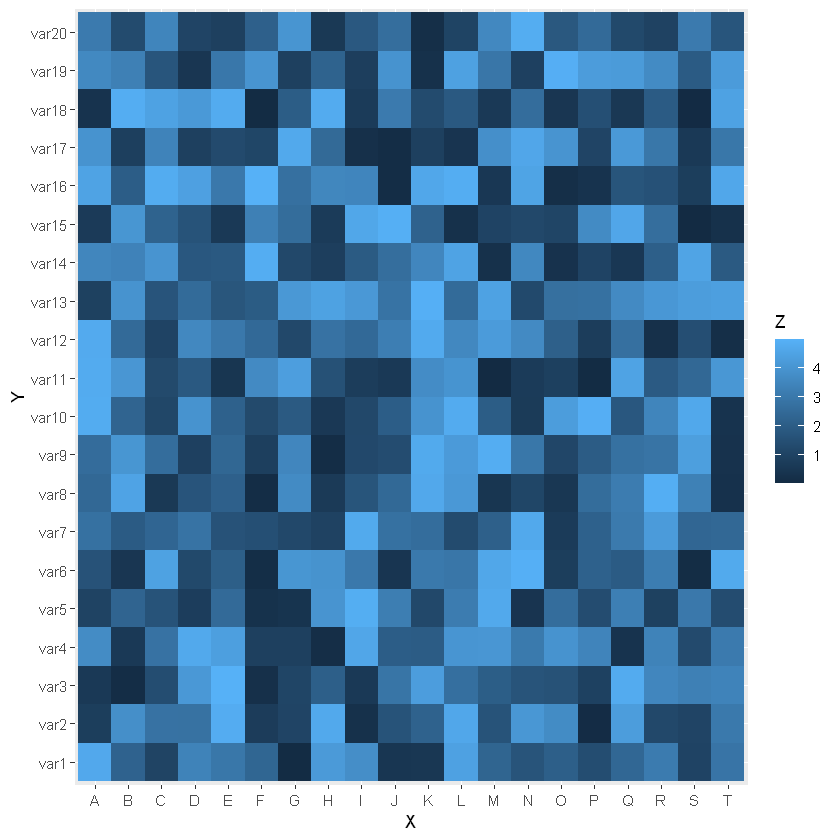

In [67]:
# Heatmap 
ggplot(data, aes(X, Y, fill= Z)) + 
      geom_tile()

Another example

In [68]:
# Fake dataset
players = c("Michael", "LeBron", "Kobe")
points = c(35, 40, 45)
assists = c(10, 12, 5)
rebounds = c(15, 12, 5)

# Creating tibble
basket = tibble(players, points, assists, rebounds)


One important thing is to **standardize variables' values for heatmaps**. Because if the values are not within the same range, the information will not be representative of all the variables

In [69]:
# Standardized cols
basket$std_points = basket$points / max(basket$points)
basket$std_assists = basket$assists / max(basket$assists)
basket$std_rebounds = basket$rebounds / max(basket$rebounds)


In [70]:
# Creating std tibble
basket_std = select(basket, "players", "std_points", "std_assists", "std_rebounds")

head(basket_std)


players,std_points,std_assists,std_rebounds
<chr>,<dbl>,<dbl>,<dbl>
Michael,0.7777778,0.8333333,1.0000000
LeBron,0.8888889,1.0000000,0.8000000
Kobe,1.0000000,0.4166667,0.3333333


As you may see, this tibble is in `wide data format`, so we should transform it to `long data format` data with the command `pivot_longer()`

In [71]:
basket_std = pivot_longer(basket_std,
                          c("std_points", "std_assists", "std_rebounds"),
                         names_to = "stat",
                         values_to = "value")

head(basket_std)

players,stat,value
<chr>,<chr>,<dbl>
Michael,std_points,0.7777778
Michael,std_assists,0.8333333
Michael,std_rebounds,1.0000000
LeBron,std_points,0.8888889
LeBron,std_assists,1.0000000
LeBron,std_rebounds,0.8000000


Now we can create the heatmap

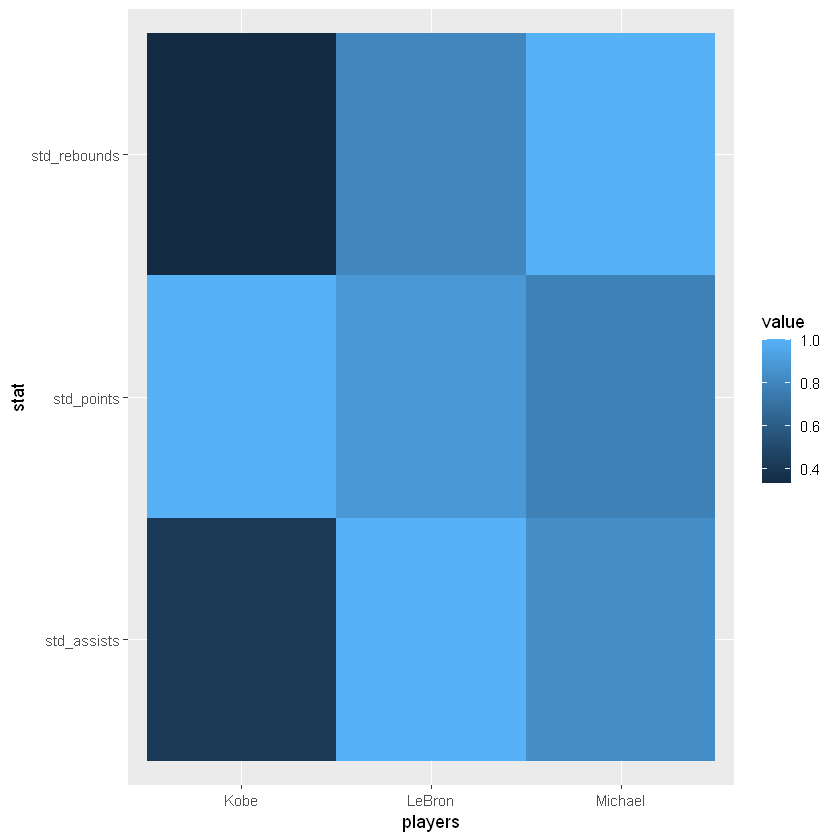

In [72]:
# Heatmap 
ggplot(basket_std, aes(players, stat, fill = value)) + 
      geom_tile()

## 4. Annotations

